In [1]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler

In [3]:
df=pd.read_csv('Employee.csv')
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
#Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [7]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [9]:
#Looking for null values
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [11]:
df['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [13]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [15]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [17]:
df['Salary'].unique()

array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])

In [19]:
#Dealing with Missing Values in Company column
#As we have 8 values missing value we will fill with random elements
df2=df

In [21]:
df2['Company'][df2['Company'].isnull()]=df['Company'].dropna().sample(df['Company'].isnull().sum()).values

C:\Users\user\AppData\Local\Temp\ipykernel_7044\2031707532.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['Company'][df2['Company'].isnull()]=df['Company'].dropna().sample(df['Company'].isnull().sum()).values
C:\Users\user\AppData\L

In [23]:
df2.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [25]:
#Filling the place column null values with most frequent elements
df2['Place']=df2['Place'].fillna(df['Place'].mode().iat[0])


In [27]:
df2['Place'].value_counts()

Place
Mumbai        51
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

In [29]:
df2.isnull().sum()

Company     0
Age        18
Salary     24
Place       0
Country     0
Gender      0
dtype: int64

In [31]:
#Filling AGE column with median values
Imputer=SimpleImputer(strategy='median')
df2['Age']=Imputer.fit_transform(df[['Age']])
df2['Salary']=Imputer.fit_transform(df[['Salary']])


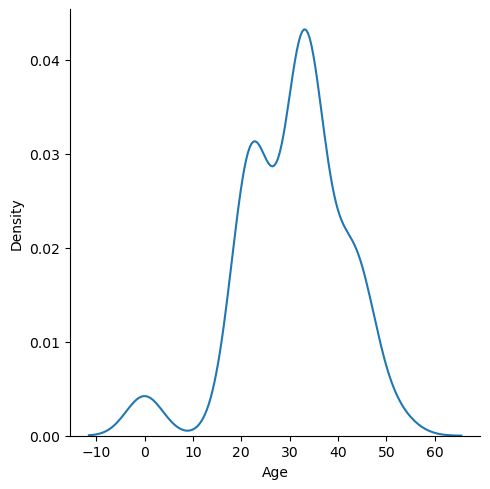

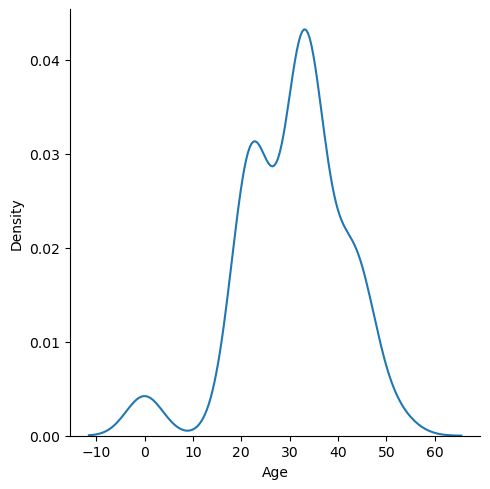

In [33]:
#Checking if the Filling caused any change in distribution of data.
sns.displot(df['Age'],label='Orginal',kind='kde')
sns.displot(df2['Age'],label='Transformed',kind='kde')


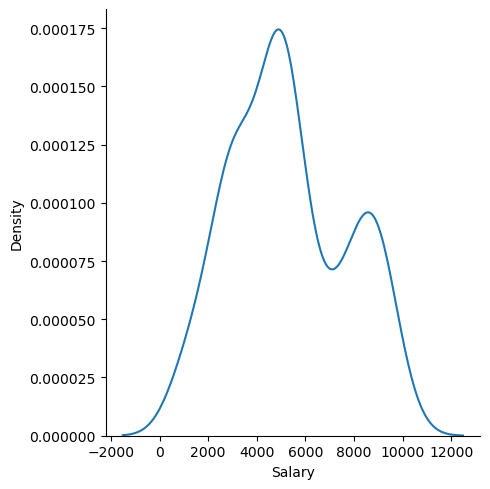

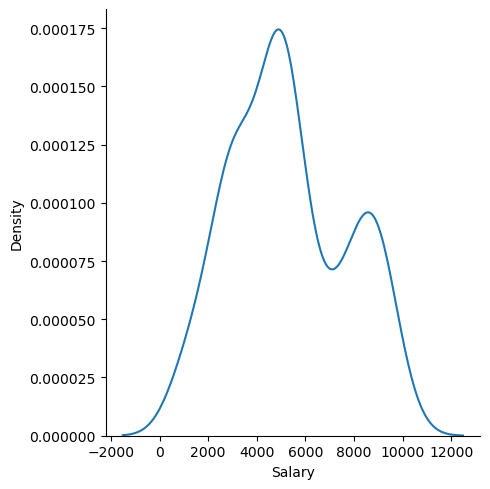

In [35]:
sns.displot(df['Salary'],label='Orginal',kind='kde')
sns.displot(df2['Salary'],label='Transformed',kind='kde')

In [37]:
#dropping duplicates
df2.drop_duplicates()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


<Axes: >

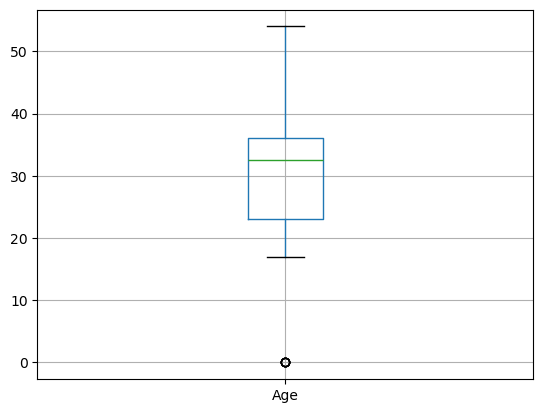

In [39]:
#Checking for Outliers
df2[['Age']].boxplot()

In [41]:
#Removing outliers of AGE
q1=df2['Age'].quantile(0.05)
q1

18.35

In [43]:
q3=df2['Age'].quantile(0.95)
q3

45.0

<Axes: >

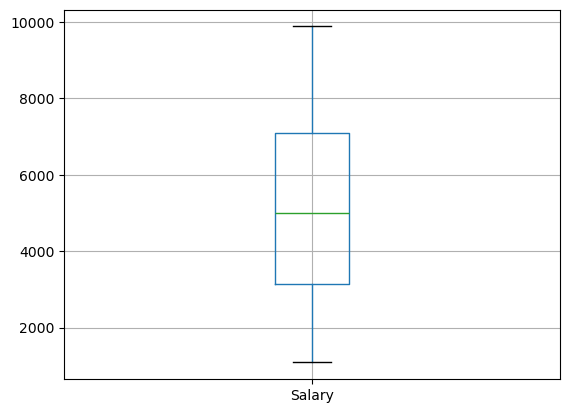

In [45]:
df2[['Salary']].boxplot()

In [47]:
q1s=df2['Salary'].quantile(0.05)
q2s=df2['Salary'].quantile(0.95)
print(q1s)
print(q2s)

1514.0000000000005
9024.0


In [49]:
#Filtering data to remove outliers
df3=df2.loc[((df2['Age']>q1)&(df2['Age']<q3))&((df2['Salary']>q1s)&(df2['Salary']<q2s))]

In [51]:
#Filtering the data
#age>40&salary<5000
df3[(df3['Age']>40)&(df3['Salary']<5000)]

,Company,Age,Salary,Place,Country,Gender
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
104,Infosys,44.0,4034.0,Delhi,India,0
122,Infosys,44.0,3234.0,Mumbai,India,0
138,CTS,44.0,3033.0,Cochin,India,0
140,Infosys,44.0,4034.0,Hyderabad,India,0
145,Infosys,44.0,4034.0,Delhi,India,1


In [53]:
df3['Place'].value_counts()

Place
Mumbai        42
Calcutta      25
Cochin        12
Chennai       10
Delhi         10
Noida          7
Hyderabad      6
Pune           2
Podicherry     1
Bhopal         1
Nagpur         1
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Salary'>

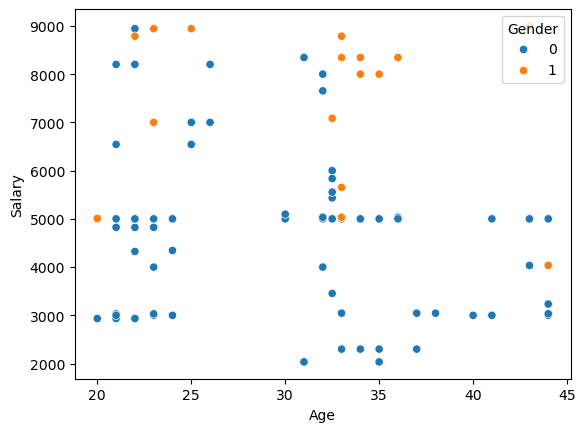

In [55]:
#Scatter plot analysis between age and salary
x=df3['Age']
y=df3['Salary']
sns.scatterplot(x=x,y=y,hue=df['Gender'])

In [57]:
#Counting people from each place
place=df3['Place'].value_counts()
print(place)


Place
Mumbai        42
Calcutta      25
Cochin        12
Chennai       10
Delhi         10
Noida          7
Hyderabad      6
Pune           2
Podicherry     1
Bhopal         1
Nagpur         1
Name: count, dtype: int64


<Axes: xlabel='Place'>

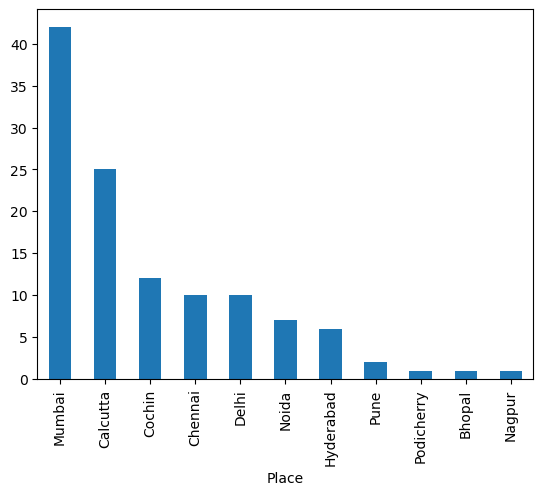

In [59]:
place.plot(kind='bar')

In [61]:
#Data Encoding
df4=pd.get_dummies(df3[['Company','Place']],drop_first=True,dtype=int)
final_df=pd.concat([df3,df4],axis=1)

In [63]:
final_df

,Company,Age,Salary,Place,Country,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,...,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,TCS,20.0,5000.0,Chennai,India,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,Infosys,30.0,5000.0,Mumbai,India,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,TCS,35.0,2300.0,Calcutta,India,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,Infosys,40.0,3000.0,Delhi,India,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,TCS,23.0,4000.0,Mumbai,India,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
144,Infosys,22.0,8787.0,Calcutta,India,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
145,Infosys,44.0,4034.0,Delhi,India,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
146,TCS,33.0,5034.0,Mumbai,India,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [65]:
#Scaling the Numerical Columns
scalar=StandardScaler()
scalar2=MinMaxScaler()
final_df['Age']=scalar.fit_transform(final_df[['Age']])
final_df['Salary']=scalar2.fit_transform(final_df[['Salary']])

In [67]:
#Final DF suitable for ML algorithms
final_df.drop(columns=['Place','Country','Company'],axis=1)

,Age,Salary,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,-1.473770,0.425782,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,-0.095424,0.425782,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.593749,0.038185,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,1.282922,0.138674,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-1.060266,0.282228,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,-1.198101,0.885444,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
144,-1.198101,0.969423,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
145,1.834260,0.287109,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
146,0.318080,0.430663,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
